In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Membaca Gambar

In [9]:
img = cv2.imread("citraWarnaErin.jpg")

In [3]:
img.shape

(2440, 4096, 3)

### KONVERT BRG ke RGB

In [17]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

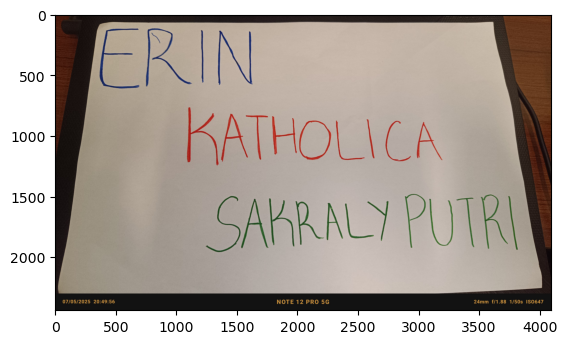

In [18]:
plt.imshow(rgb)

### DETEKSI RGB

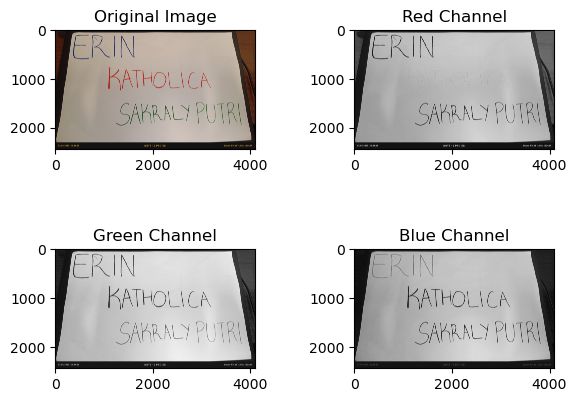

In [32]:
plt.subplot(2, 2, 1)
plt.imshow(rgb)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(rgb[:, :, 0], cmap="gray")
plt.title('Red Channel')

plt.subplot(2, 2, 3)
plt.imshow(rgb[:, :, 1], cmap="gray")
plt.title('Green Channel')

plt.subplot(2, 2, 4)
plt.imshow(rgb[:, :, 2], cmap="gray")
plt.title('Blue Channel')

plt.tight_layout(pad=3.0)  # Tambahkan ini untuk memberi jarak antar subplot
plt.show()


### HISTOGRAM PADA GAMBAR 

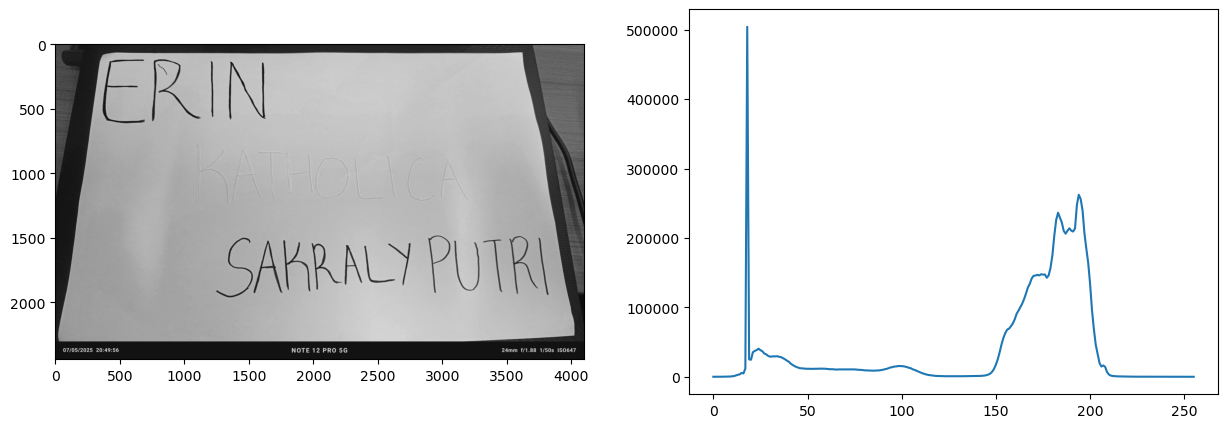

In [35]:
#Merah
merah=rgb[:,:,0] 
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([merah],[0],None,[256],[0,256])
axs[0].imshow(merah, cmap='gray')
axs[1].plot(hist)
plt.show()
#ERIN_202331092

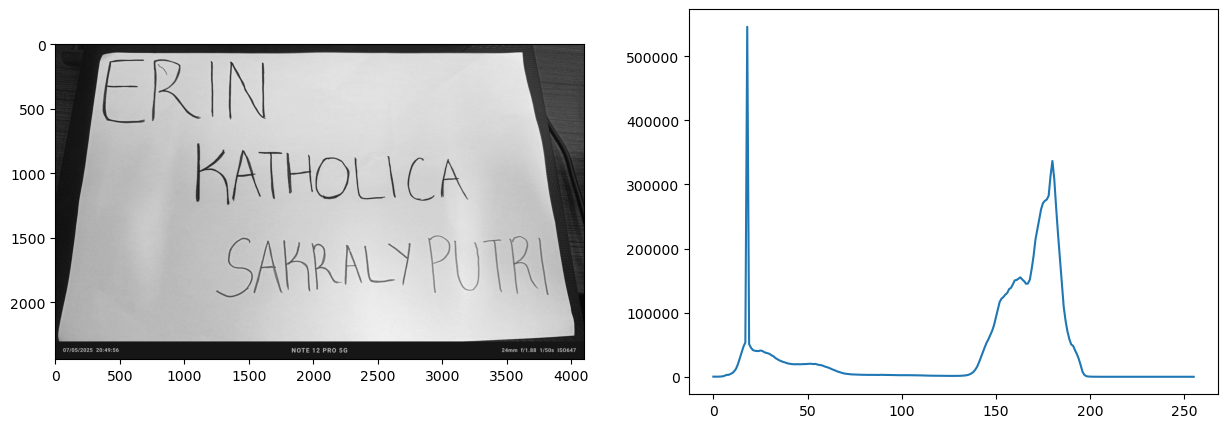

In [36]:
#Hijau
merah=rgb[:,:,1] 
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([hijau],[0],None,[256],[0,256])
axs[0].imshow(hijau, cmap='gray')
axs[1].plot(hist)
plt.show()
#ERIN_202331092

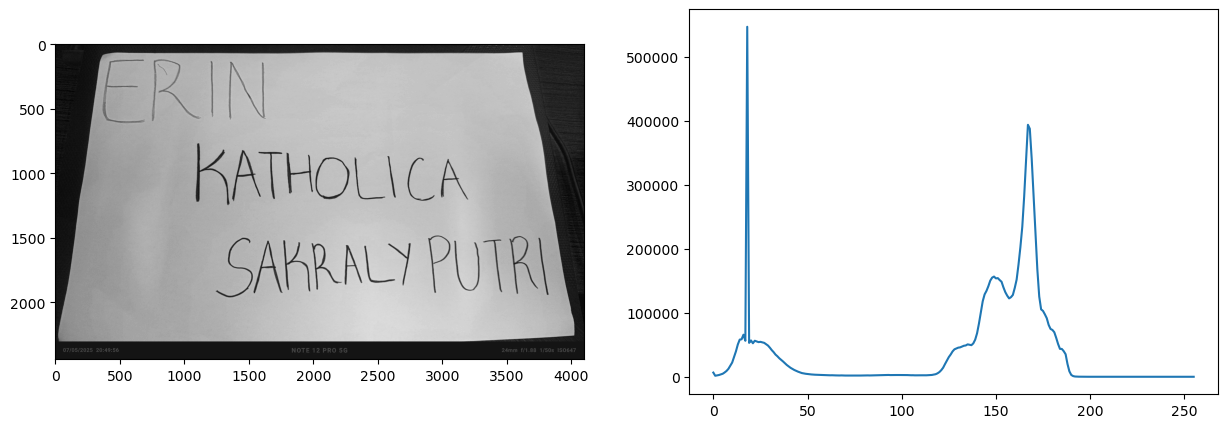

In [37]:
#Biru
biru=rgb[:,:,2] 
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([biru],[0],None,[256],[0,256])
axs[0].imshow(biru, cmap='gray')
axs[1].plot(hist)
plt.show()

### AMBANG BATAS

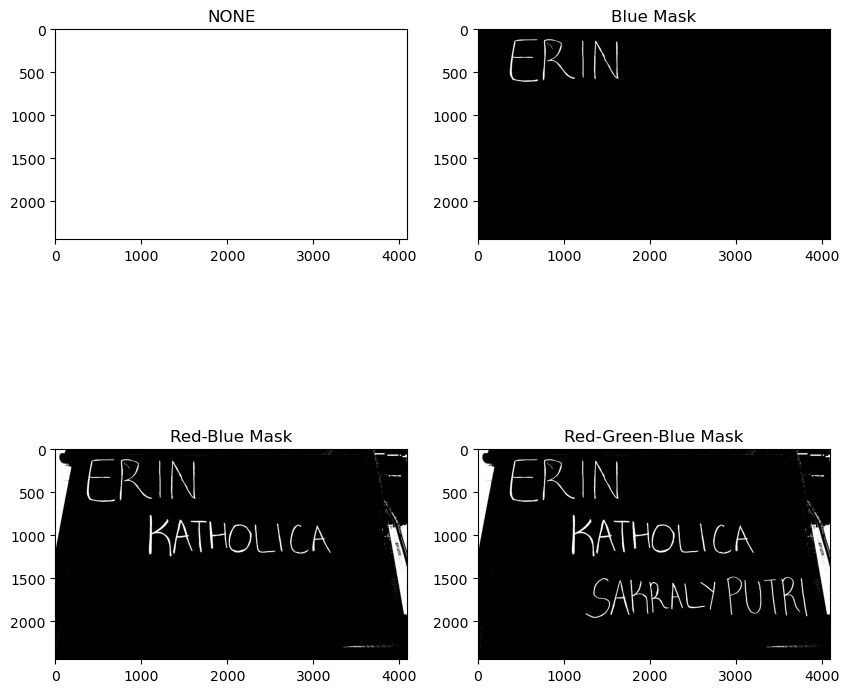

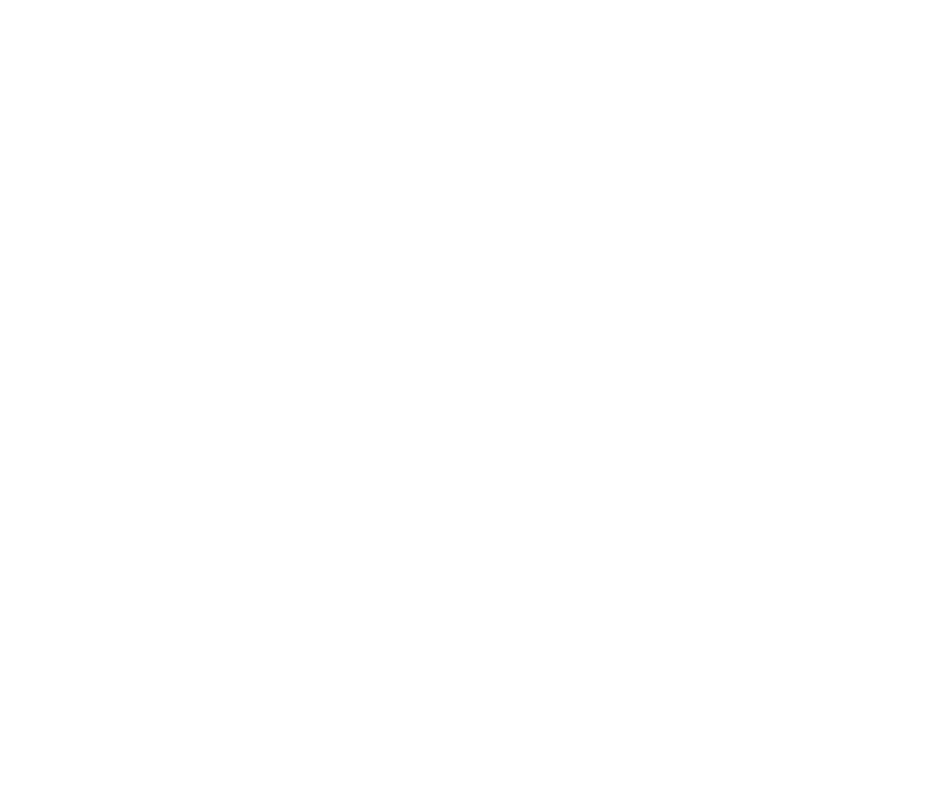

In [40]:
image_hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50]) 
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([36, 50, 50])
green_upper = np.array([86, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])

mask_red1 = cv2.inRange(image_hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(image_hsv, red_lower2, red_upper2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)  # Combine the red masks
mask_green = cv2.inRange(image_hsv, green_lower, green_upper)
mask_blue = cv2.inRange(image_hsv, blue_lower, blue_upper)

combined_mask1 = np.bitwise_or(mask_red, mask_blue)
combined_mask2 = np.bitwise_or(combined_mask1, mask_green)

(thresh, binary1) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
axs[0,1].imshow(mask_blue, cmap='gray')
axs[0,1].set_title('Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
axs[1,0].imshow(combined_mask1, cmap='gray')
axs[1,0].set_title('Red-Blue Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
axs[1,1].imshow(combined_mask2, cmap='gray')
axs[1,1].set_title('Red-Green-Blue Mask')
plt.axis('off')

plt.show()

### MEMPERBAKI GAMBAR BLACK LIGHT

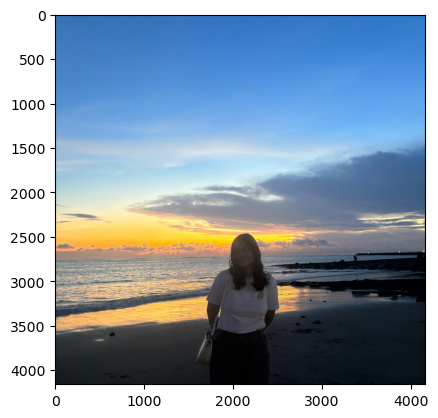

In [26]:
img2 = cv2.imread("gambarBlacklight.jpg")
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb2)

### GAMBAR ASLI

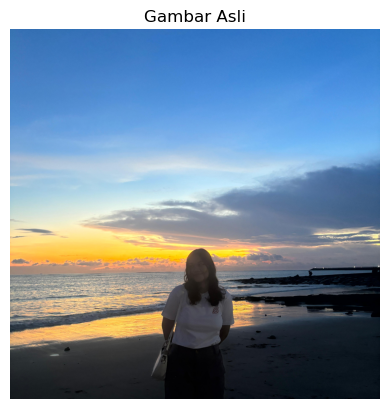

In [27]:
img = cv2.imread("gambarBlacklight.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()


### Gambar Grayscale

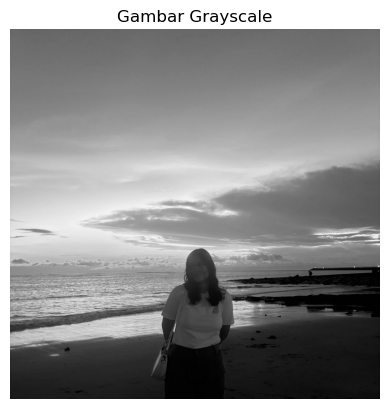

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis("off")
plt.show()


### Gambar Grayscale yang  dicerahkan 

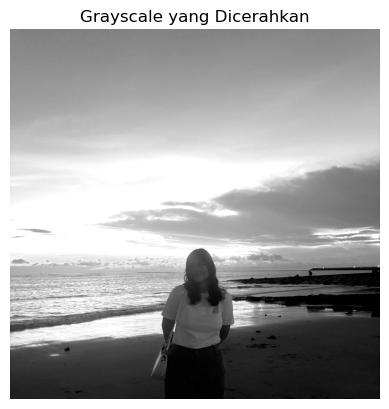

In [29]:
bright = cv2.convertScaleAbs(gray, alpha=1, beta=50)

plt.imshow(bright, cmap='gray')
plt.title("Grayscale yang Dicerahkan")
plt.axis("off")
plt.show()


### Gambar Grayscale yang diperkontras

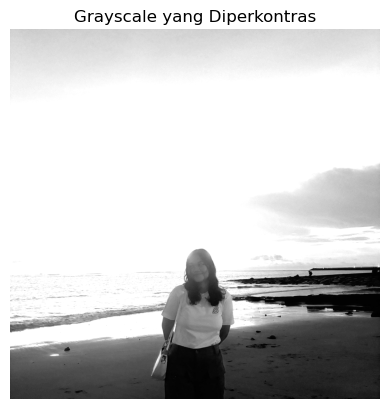

In [30]:
contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=0)

plt.imshow(contrast, cmap='gray')
plt.title("Grayscale yang Diperkontras")
plt.axis("off")
plt.show()


### Gambar Grayscale yang dicerahkan dan diperkontras

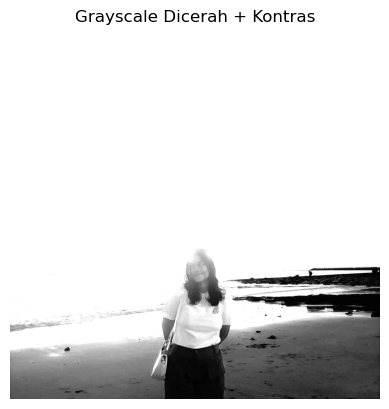

In [31]:
bright_contrast = cv2.convertScaleAbs(bright, alpha=2.0, beta=0)

plt.imshow(bright_contrast, cmap='gray')
plt.title("Grayscale Dicerah + Kontras")
plt.axis("off")
plt.show()
